In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Dataset/Train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Dataset/Test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(
    train_generator,
    steps_per_epoch=14,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=6)

loss, accuracy = model.evaluate(validation_generator, steps=50)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = model.predict(img)

    if prediction[0] > 0.5:
        print("Human detected in the image.")
    else:
        print("No human detected in the image.")

# Test the prediction
predict_image('/content/drive/My Drive/Dataset/surya.jpg')

model_save_path = '/content/drive/My Drive/Dataset/my_model.keras'
model.save(model_save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


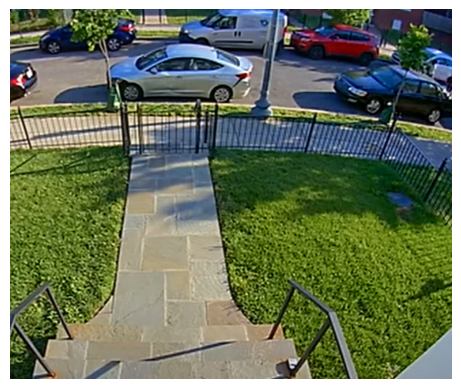

No human detected in the image.


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

model = load_model('/content/drive/My Drive/Dataset/my_model.h5')

# Load and preprocess the image
img_path = '/content/drive/My Drive/Dataset/1.png'
img = image.load_img(img_path, target_size=(256, 256))  # Load image with the target size
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Use the model's predict function
predictions = model.predict(img_array)
    # Display the image
img = load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

if predictions[0] > 0.5:
        print("Human detected in the image.")
else:
        print("No human detected in the image.")